c:\Users\sebas\pycontinuum\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


System to solve:
0: x^5 - y^2 + y^5
1: x + x^5*y + y^3 + 1


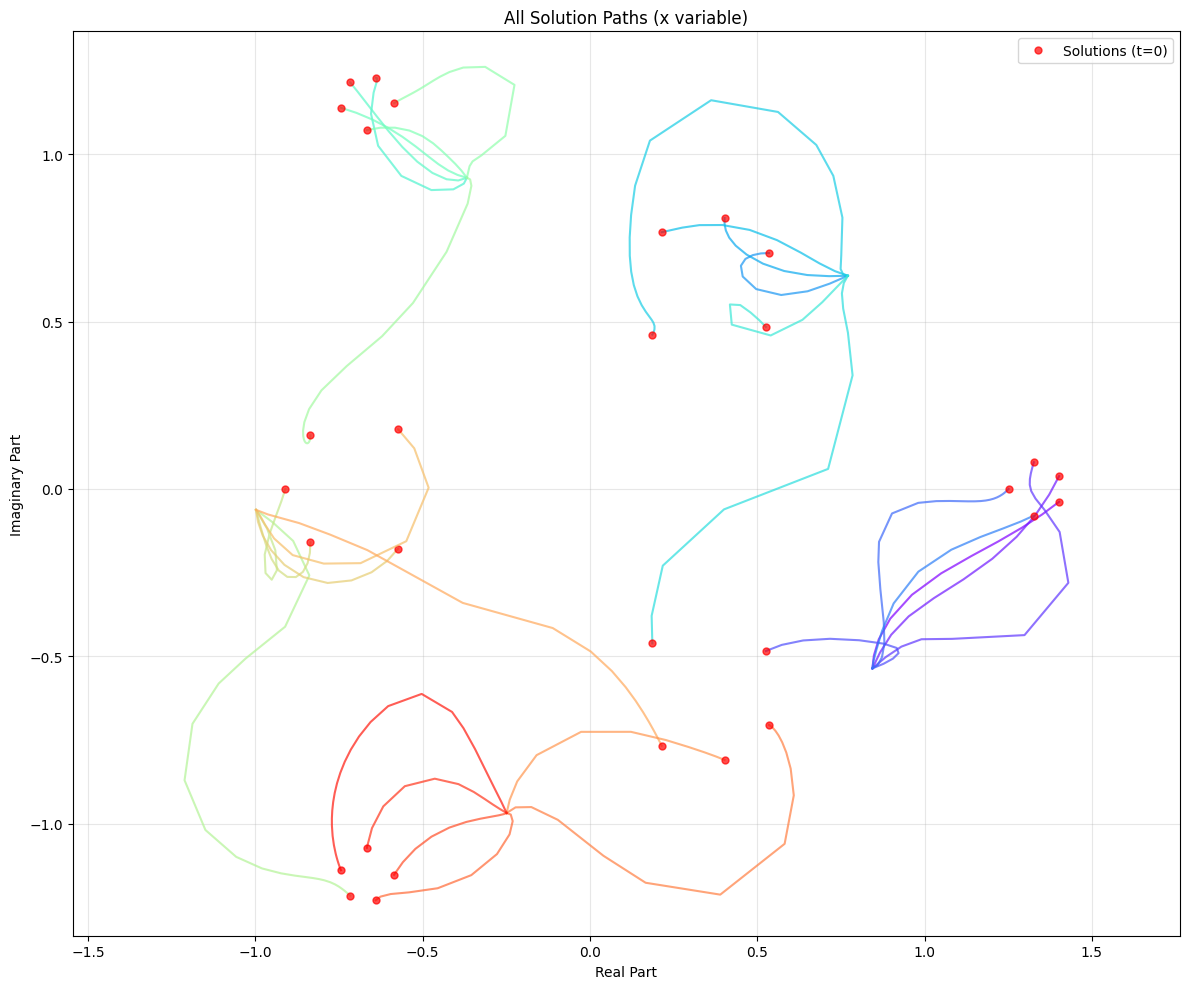

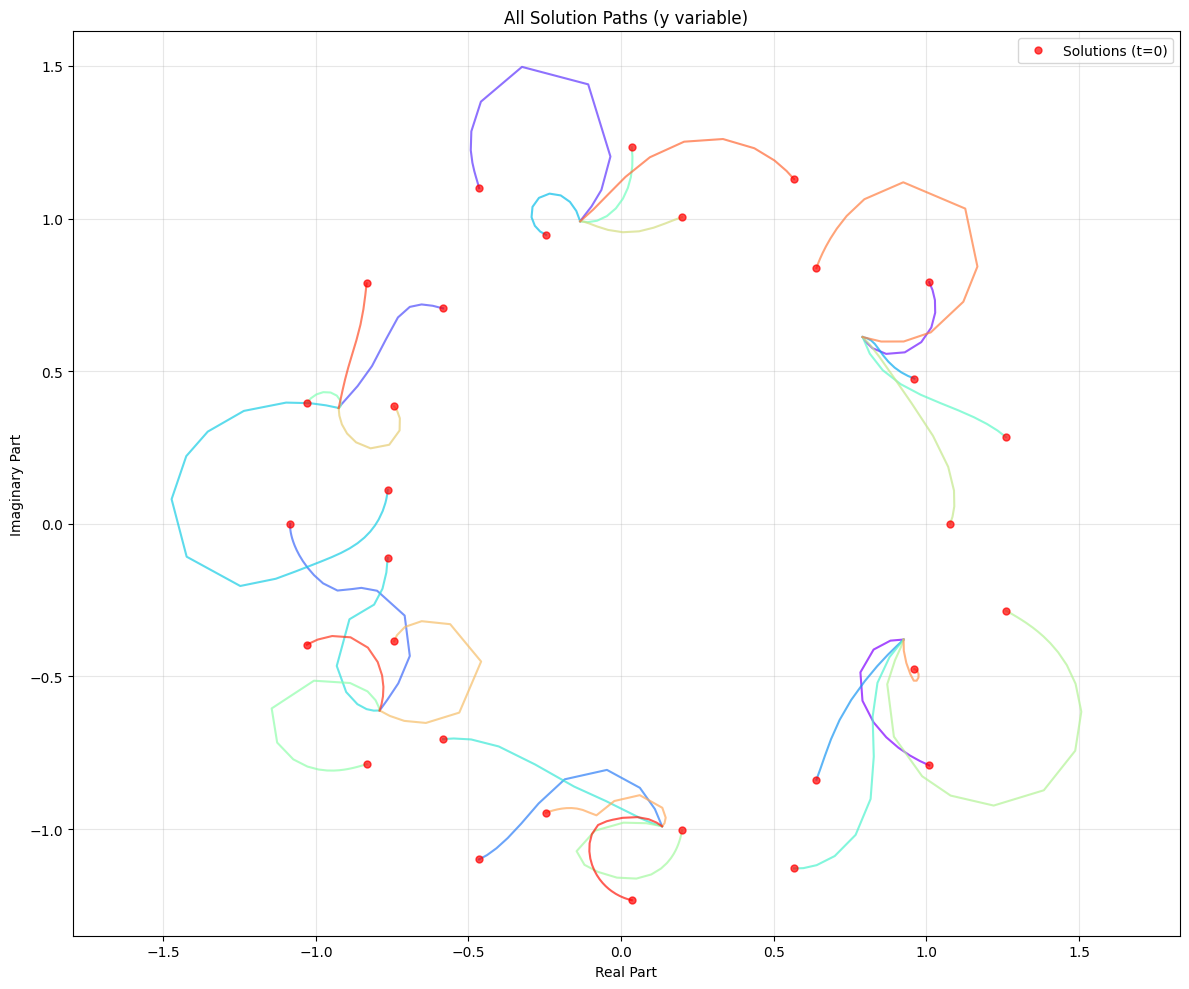


Found 30 solutions:

Solution 1:
Solution (singular, residual=1.86e-15):
  x = 1.0092398 - 0.7913573j
  y = 1.4019684 - 0.038367584j

Solution 2:
Solution (singular, residual=2.04e-15):
  x = 1.0092398 + 0.7913573j
  y = 1.4019684 + 0.038367584j

Solution 3:
Solution (singular, residual=6.05e-12):
  x = -0.46531168 + 1.099522j
  y = 1.3263758 + 0.079722262j

Solution 4:
Solution (singular, residual=2.50e-16):
  x = -0.58335571 + 0.70545554j
  y = 0.52577021 - 0.48428303j

Solution 5:
Solution (singular, residual=2.85e-12):
  x = -1.0840893
  y = 1.250833

Solution 6:
Solution (singular, residual=1.51e-15):
  x = -0.46531168 - 1.099522j
  y = 1.3263758 - 0.079722262j

Solution 7:
Solution (singular, residual=4.71e-16):
  x = 0.63990327 - 0.8380732j
  y = 0.53493357 + 0.70503596j

Solution 8:
Solution (singular, residual=4.49e-15):
  x = 0.96063945 + 0.47572731j
  y = 0.40227411 + 0.80972456j

Solution 9:
Solution (singular, residual=8.83e-16):
  x = -0.24645994 + 0.94666642j
  y = 0.21

In [1]:
from pycontinuum import PolynomialSystem, solve, polyvar
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define variables
x, y = polyvar('x', 'y')

# 2. Define equations
equation1 = x**5 + y**5 - y**2
equation2 = y**3 + x**5*y + x + 1

# 3. Create the polynomial system
system = PolynomialSystem([equation1, equation2])
print("System to solve:")
print(system)

# 4. Solve the system with path tracking
solutions = solve(system, store_paths=True)

# 5. Visualize all solution paths together
from pycontinuum.visualization import plot_all_paths

# Collect all paths that have tracking data
all_paths = [sol.path_points for sol in solutions if sol.path_points]
x
if all_paths:
    # Plot all paths for x variable
    fig = plot_all_paths(all_paths, var_idx=0, 
                         title="All Solution Paths (x variable)", 
                         alpha=0.7)  # Adjust transparency if needed
    plt.show()
    
    # You can also plot the y variable paths
    fig2 = plot_all_paths(all_paths, var_idx=1, 
                         title="All Solution Paths (y variable)", 
                         alpha=0.7)
    plt.show()

# 6. Display results
print(f"\nFound {len(solutions)} solutions:")
for i, sol in enumerate(solutions):
    print(f"\nSolution {i+1}:")
    print(sol)

# 7. Filter real solutions
real_solutions = solutions.filter(real=True)
print(f"\nReal solutions: {len(real_solutions)}")
print(real_solutions)

In [10]:
from pycontinuum import polyvar, PolynomialSystem, solve
import numpy as np
import matplotlib.pyplot as plt

# Create a simple polynomial system
x, y = polyvar('x', 'y')

# Simple system with a few solutions
equation1 = x**2 + y**2 - 2  # Circle
equation2 = y - x**2      # Parabola

system = PolynomialSystem([equation1, equation2])
print("System to solve:")
print(system)

# Solve the system with path tracking
solutions = solve(system)

# Collect all paths that have tracking data
all_paths = [sol.path_points for sol in solutions if sol.path_points]

if all_paths:
    # Plot all paths for x variable
    fig = plot_all_paths(all_paths, var_idx=0, 
                         title="All Solution Paths (x variable)", 
                         alpha=0.7)  # Adjust transparency if needed
    plt.show()
    
    # You can also plot the y variable paths
    fig2 = plot_all_paths(all_paths, var_idx=1, 
                         title="All Solution Paths (y variable)", 
                         alpha=0.7)
    plt.show()

# Print real solutions
print("\nReal solutions:")
print(solutions.filter(real=True))

System to solve:
0: x^2 + y^2 - 2
1: -x^2 + y

Real solutions:
SolutionSet: 2 solutions (2 real, 2 singular)
Tracked 4 paths, found 2 distinct solutions
Solve time: 0.52 seconds

Solution (singular, residual=5.74e-15):
  x = -1
  y = 1

Solution (singular, residual=5.74e-15):
  x = 1
  y = 1


Polynomial System:
0: (-2+0j)*x + x^2 + (1+0j)
1: -x + y
Expected singular solution at x=1, y=1 (multiplicity 2)

=== Solving WITHOUT endgame ===
Variables used for solving: [y, x]
Generating total-degree start system...
Using total-degree homotopy with 2 start paths (2 * 1)
Tracking 2 paths...
Tracking 2 paths from t=1 to t=0...


  0%|          | 0/2 [00:00<?, ?it/s]

Path tracking complete: 2/2 successful paths
Processing and classifying solutions...
Attempting to deduplicate 2 raw solutions...
Found 2 distinct solutions (from 2 raw solutions)
Solution process completed in 0.37 seconds
SolutionSet: 2 solutions (0 real, 0 singular)
Tracked 2 paths, found 2 distinct solutions
Solve time: 0.37 seconds

Solution (regular, residual=6.63e-08):
  x = 0.99994547 + 0.00025157318j
  y = 0.99994547 + 0.00025157318j

Solution (regular, residual=8.10e-09):
  x = 1.000019 + -8.7944764e-05j
  y = 1.000019 + -8.7944764e-05j

=== Solving WITH endgame ===
Variables used for solving: [y, x]
Generating total-degree start system...
Using total-degree homotopy with 2 start paths (2 * 1)
Tracking 2 paths...
Tracking 2 paths from t=1 to t=0...


  0%|          | 0/2 [00:00<?, ?it/s]

Potential singularity detected!
Switching to Cauchy endgame at t=2.4046108698600258e-06
Potential singularity detected!
Switching to Cauchy endgame at t=2.4046108698600258e-06
Path tracking complete: 2/2 successful paths
Processing and classifying solutions...
Attempting to deduplicate 2 raw solutions...
Found 1 distinct solutions (from 2 raw solutions)
Solution process completed in 4.42 seconds
SolutionSet: 1 solutions (0 real, 1 singular)
Tracked 2 paths, found 1 distinct solutions
Solve time: 4.42 seconds

Solution (singular, residual=8.81e-10):
  x = 1.0000067 + 2.8918425e-05j
  y = 1.0000067 + 2.8918425e-05j

=== Solution Analysis ===
Without endgame:
Solution 1: x = 0.99994547+0.00025157j, y = 0.99994547+0.00025157j
  Singular: False, Residual: 6.63e-08
Solution 2: x = 1.00001901-0.00008794j, y = 1.00001901-0.00008794j
  Singular: False, Residual: 8.10e-09

With endgame:
Solution 1: x = 1.00000668+0.00002892j, y = 1.00000668+0.00002892j
  Singular: True, Residual: 8.81e-10
  Wind

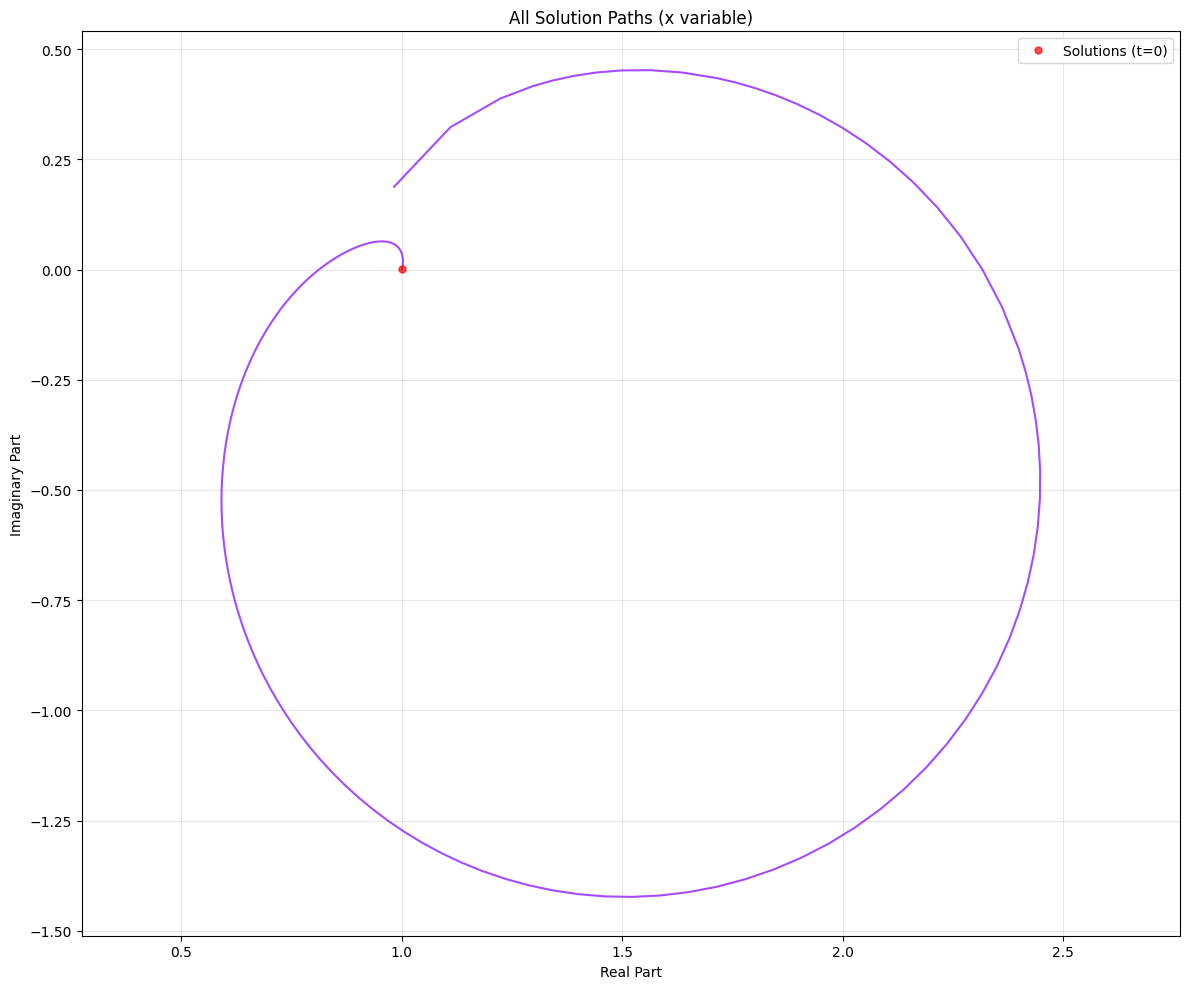

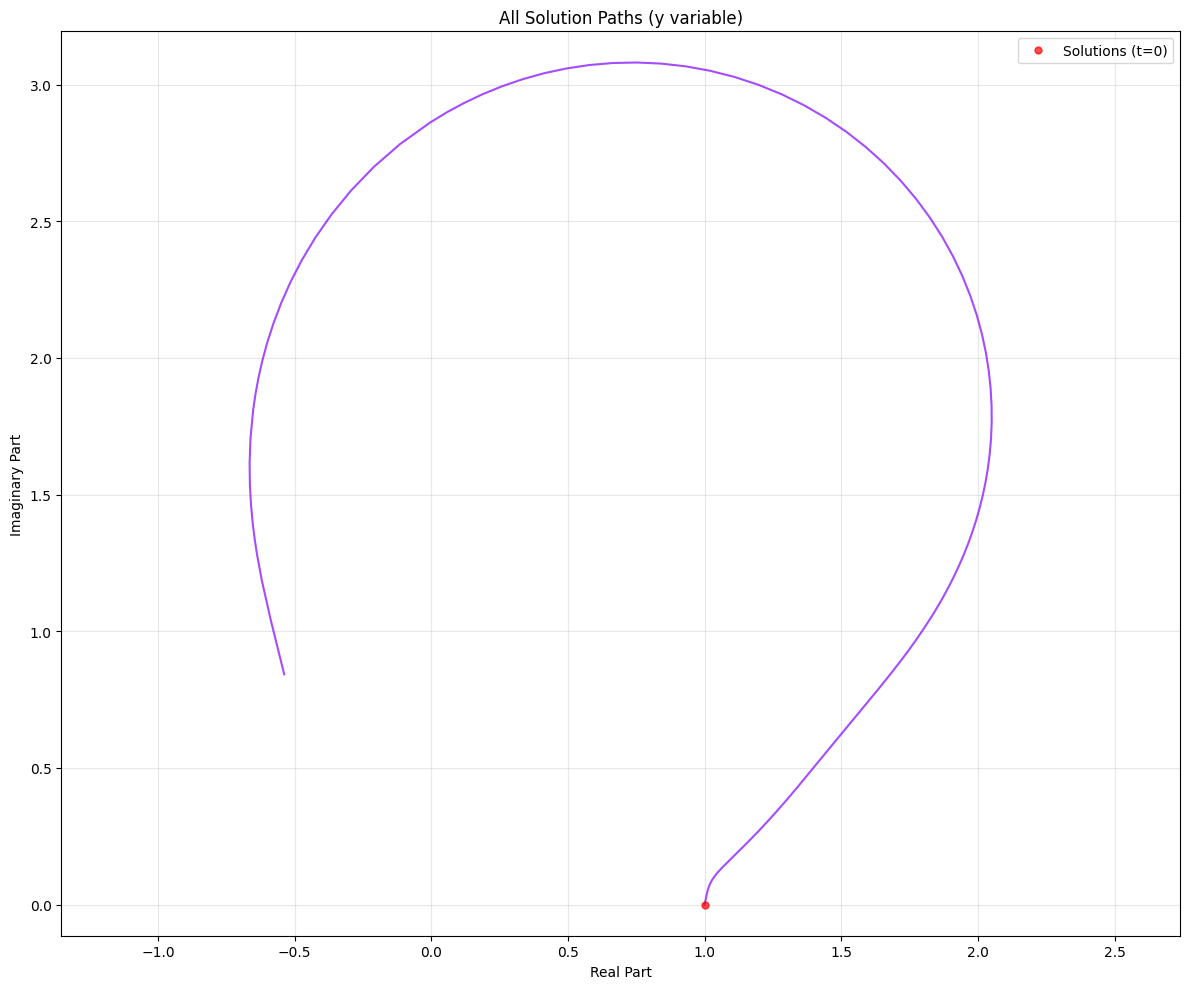

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pycontinuum import polyvar, Polynomial, PolynomialSystem, solve

# Create a better test system for singularity
def create_better_singular_system():
    x, y = polyvar('x', 'y')
    
    f1 = (x - 1)**2
    f2 = y - x
    
    system = PolynomialSystem([f1, f2])
    return system, (x, y)

# Create our improved test system
system, (x, y) = create_better_singular_system()
print("Polynomial System:")
print(system)
print(f"Expected singular solution at x=1, y=1 (multiplicity 2)")

# Add debugging to the endgame implementation 
# Print statements in endgame.py's track_loop function can help see what's happening

# Solve with both methods
print("\n=== Solving WITHOUT endgame ===")
result_without_endgame = solve(system, use_endgame=False, verbose=True, tol=1e-8)
print(result_without_endgame)

print("\n=== Solving WITH endgame ===")
# Lower the endgame_start threshold to start endgame earlier
result_with_endgame = solve(system, use_endgame=True, verbose=True, tol=1e-8, store_paths=True)
print(result_with_endgame)



# Analyze results
print("\n=== Solution Analysis ===")
print("Without endgame:")
for i, sol in enumerate(result_without_endgame):
    print(f"Solution {i+1}: x = {sol.values[x]:.8f}, y = {sol.values[y]:.8f}")
    print(f"  Singular: {sol.is_singular}, Residual: {sol.residual:.2e}")

print("\nWith endgame:")
for i, sol in enumerate(result_with_endgame):
    print(f"Solution {i+1}: x = {sol.values[x]:.8f}, y = {sol.values[y]:.8f}")
    print(f"  Singular: {sol.is_singular}, Residual: {sol.residual:.2e}")
    if hasattr(sol, 'winding_number'):
        print(f"  Winding number: {sol.winding_number}")
        

# Collect all paths that have tracking data
all_paths = [sol.path_points for sol in result_with_endgame if sol.path_points]

if all_paths:
    # Plot all paths for x variable
    fig = plot_all_paths(all_paths, var_idx=0, 
                         title="All Solution Paths (x variable)", 
                         alpha=0.7)  # Adjust transparency if needed
    plt.show()
    
    # You can also plot the y variable paths
    fig2 = plot_all_paths(all_paths, var_idx=1, 
                         title="All Solution Paths (y variable)", 
                         alpha=0.7)
    plt.show()

System to solve:
0: -x*y + x + y + 4
1: x^2 - y*z + y^2
2: 4*x + 4*y + 4*z - 1


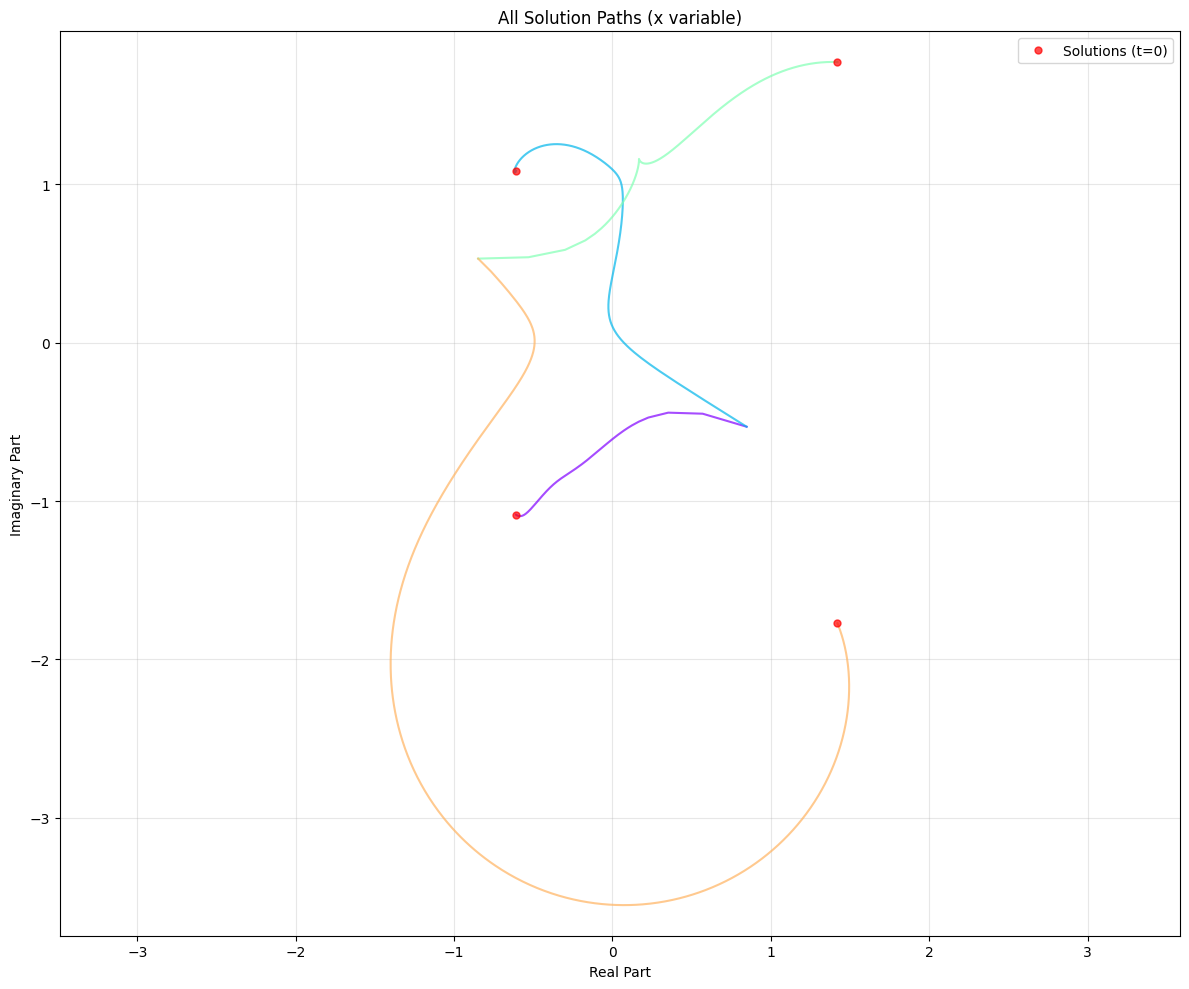

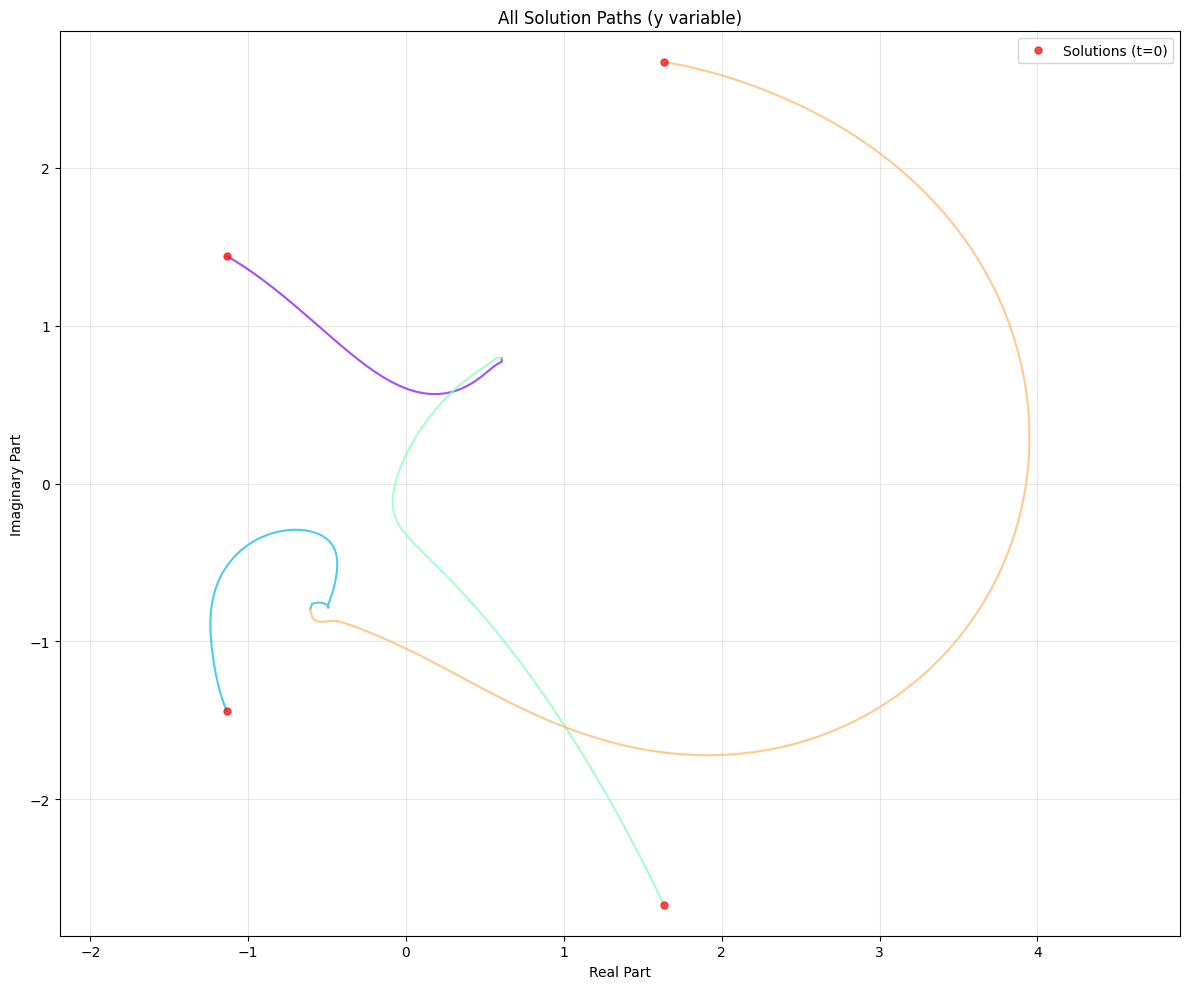


Found 4 solutions:

Solution 1:
Solution (singular, residual=8.99e-14):
  x = -1.1348079 + 1.441446j
  y = -0.60870593 + -1.0862161j
  z = 1.9935138 + -0.3552299j

Solution 2:
Solution (singular, residual=1.60e-15):
  x = -1.1348079 + -1.441446j
  y = -0.60870593 + 1.0862161j
  z = 1.9935138 + 0.3552299j

Solution 3:
Solution (singular, residual=7.93e-13):
  x = 1.6348079 + -2.6706964j
  y = 1.4212059 + 1.7720528j
  z = -2.8060138 + 0.89864357j

Solution 4:
Solution (singular, residual=4.37e-13):
  x = 1.6348079 + 2.6706964j
  y = 1.4212059 + -1.7720528j
  z = -2.8060138 + -0.89864357j

Real solutions: 0
SolutionSet: 0 solutions (0 real, 0 singular)
Tracked 4 paths, found 0 distinct solutions
Solve time: 8.12 seconds




In [12]:
from pycontinuum import PolynomialSystem, solve, polyvar
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define variables
x, y, z = polyvar('x', 'y', 'z')

# 2. Define equations
equation1 = x + y - x*y + 4
equation2 = x**2 + y**2 - z*y
equation3 = 4*x + 4*y + 4*z - 1


# 3. Create the polynomial system
system = PolynomialSystem([equation1, equation2, equation3])
print("System to solve:")
print(system)

# 4. Solve the system with path tracking
solutions = solve(system, store_paths=True)

# Collect all paths that have tracking data
all_paths = [sol.path_points for sol in solutions if sol.path_points]

if all_paths:
    # Plot all paths for x variable
    fig = plot_all_paths(all_paths, var_idx=0, 
                         title="All Solution Paths (x variable)", 
                         alpha=0.7)  # Adjust transparency if needed
    plt.show()
    
    # You can also plot the y variable paths
    fig2 = plot_all_paths(all_paths, var_idx=1, 
                         title="All Solution Paths (y variable)", 
                         alpha=0.7)
    plt.show()

# 5. Display results
print(f"\nFound {len(solutions)} solutions:")
for i, sol in enumerate(solutions):
    print(f"\nSolution {i+1}:")
    print(sol)

# 6. Filter real solutions
real_solutions = solutions.filter(real=True)
print(f"\nReal solutions: {len(real_solutions)}")
print(real_solutions)

System to solve:
0: (-2+0j)*x + x^2 + (1+0j)
1: -x + y
Newton failed to converge at t=4.0461086985963113e-07, path may be near a singularity
Switching to Cauchy endgame at t=4.0461086985963113e-07
Newton failed to converge at t=4.0461086985991404e-07, path may be near a singularity
Switching to Cauchy endgame at t=4.0461086985991404e-07


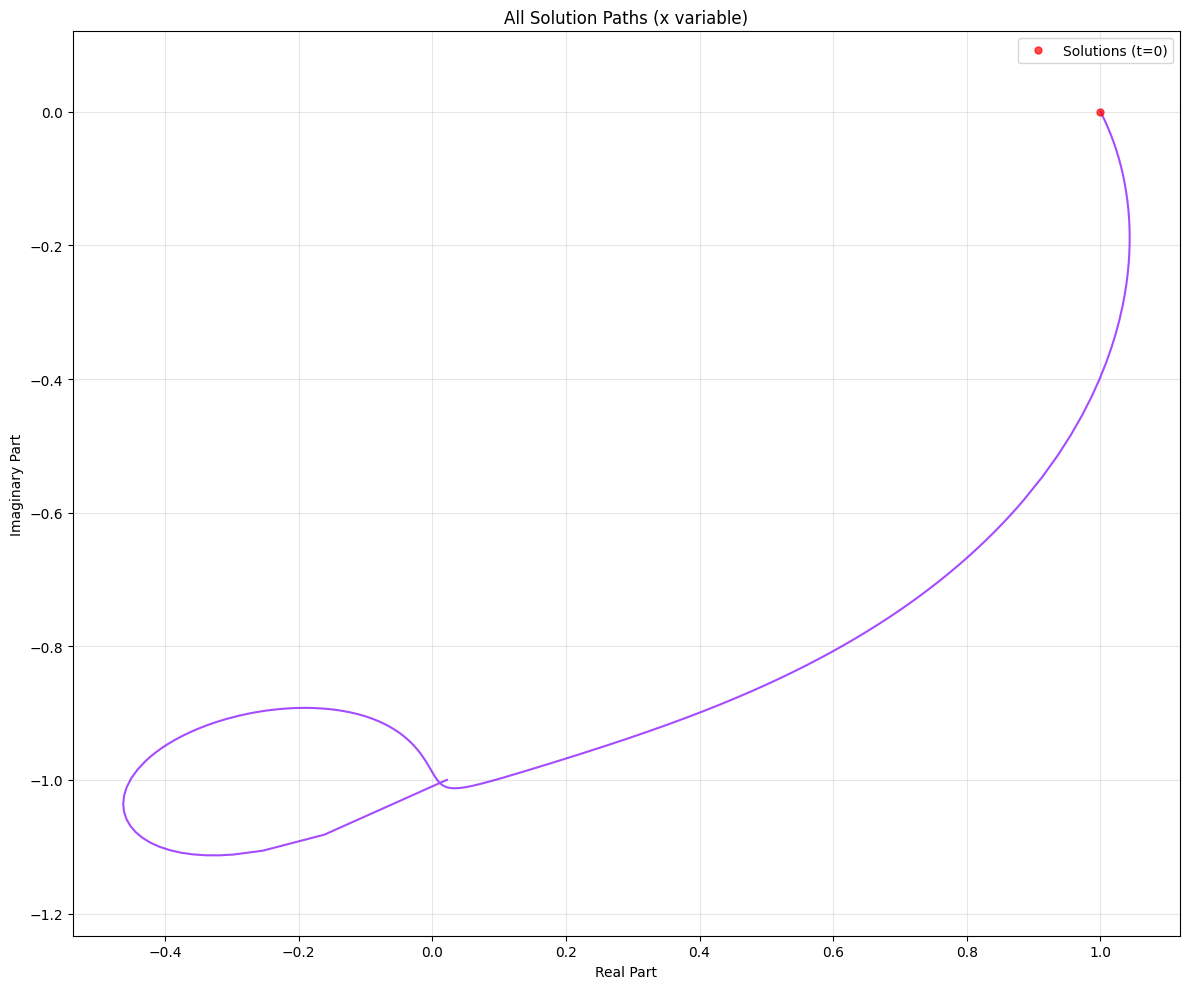

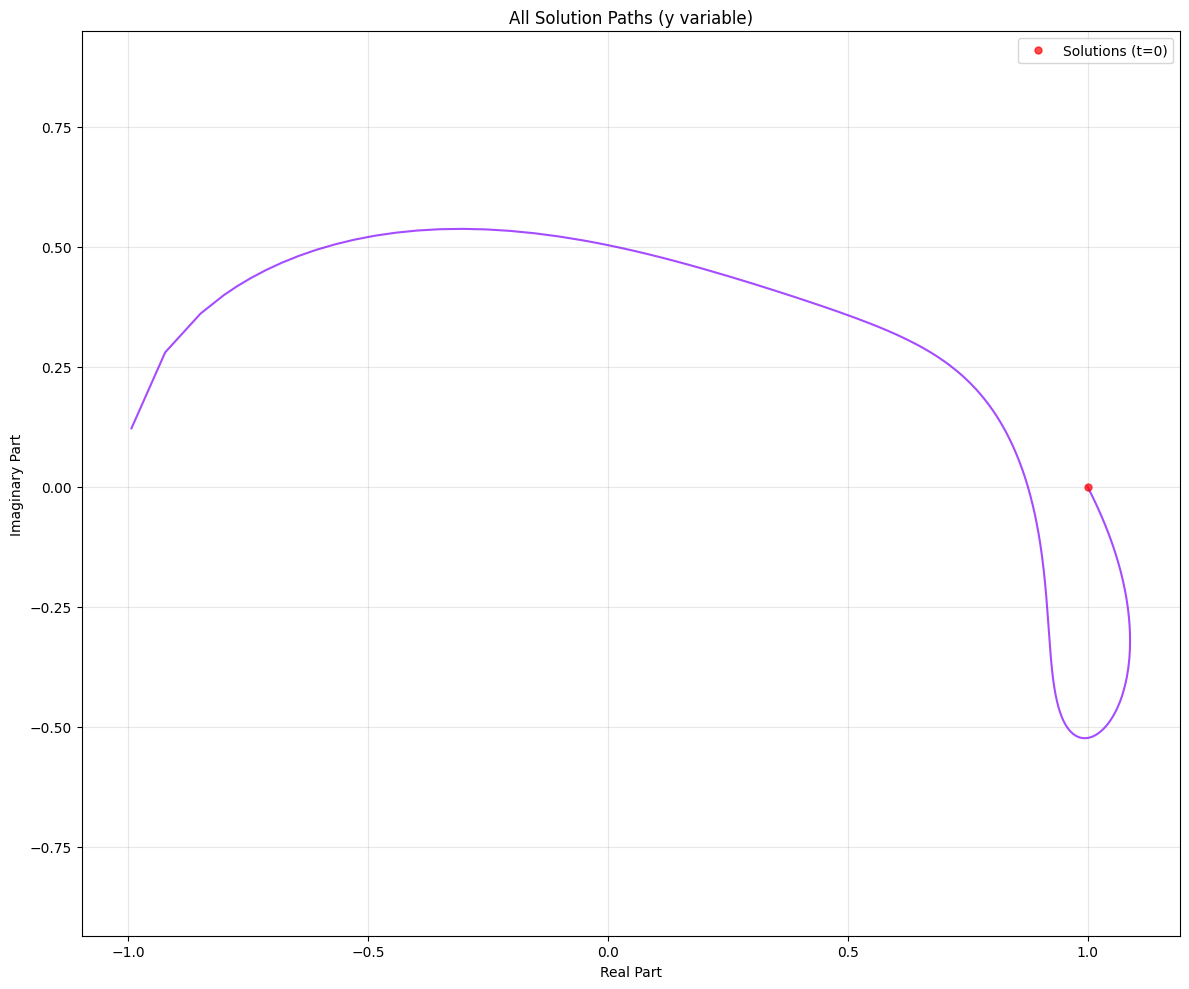


Found 1 solutions:

Solution 1:
Solution (singular, residual=7.91e-10):
  x = 1.0000128 + -2.5019217e-05j
  y = 1.0000128 + -2.5019217e-05j

Real solutions: 0
SolutionSet: 0 solutions (0 real, 0 singular)
Tracked 2 paths, found 0 distinct solutions
Solve time: 1.01 seconds




In [24]:
from pycontinuum import PolynomialSystem, solve, polyvar
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define variables
x, y= polyvar('x', 'y')

# 2. Define equations
equation1 = (x - 1)**2
equation2 = y - x


# 3. Create the polynomial system
system = PolynomialSystem([equation1, equation2])
print("System to solve:")
print(system)

# 4. Solve the system with path tracking
solutions = solve(system, store_paths=True)

# Collect all paths that have tracking data
all_paths = [sol.path_points for sol in solutions if sol.path_points]

if all_paths:
    # Plot all paths for x variable
    fig = plot_all_paths(all_paths, var_idx=0, 
                         title="All Solution Paths (x variable)", 
                         alpha=0.7)  # Adjust transparency if needed
    plt.show()
    
    # You can also plot the y variable paths
    fig2 = plot_all_paths(all_paths, var_idx=1, 
                         title="All Solution Paths (y variable)", 
                         alpha=0.7)
    plt.show()

# 5. Display results
print(f"\nFound {len(solutions)} solutions:")
for i, sol in enumerate(solutions):
    print(f"\nSolution {i+1}:")
    print(sol)

# 6. Filter real solutions
real_solutions = solutions.filter(real=True)
print(f"\nReal solutions: {len(real_solutions)}")
print(real_solutions)

In [3]:
from pycontinuum import PolynomialSystem, solve, polyvar

print("\n--- Testing System 1: Simple Double Root ---")
x, y = polyvar('x', 'y')
eq1 = x**2
eq2 = y - x
system1 = PolynomialSystem([eq1, eq2])
print("System:\n", system1)
solutions1 = solve(system1, verbose=False) # Set verbose=True to see details
print("\nResult:")
print(solutions1)
# You can add filtering tests here as before
# real_solutions1_relaxed = solutions1.filter(real=True, tol=1e-4)
# print("\nFiltered (tol=1e-4):")
# print(real_solutions1_relaxed)
print("-" * 40)




from pycontinuum import PolynomialSystem, solve, polyvar

print("\n--- Testing System 2: Tangent Circle ---")
x, y = polyvar('x', 'y')
eq1 = x**2 + y**2 - 1
eq2 = y - 1
system2 = PolynomialSystem([eq1, eq2])
print("System:\n", system2)
solutions2 = solve(system2, verbose=False)
print("\nResult:")
print(solutions2)
# real_solutions2_relaxed = solutions2.filter(real=True, tol=1e-4)
# print("\nFiltered (tol=1e-4):")
# print(real_solutions2_relaxed)
print("-" * 40)



from pycontinuum import PolynomialSystem, solve, polyvar

print("\n--- Testing System 3: Parabola Tangent ---")
x, y = polyvar('x', 'y')
eq1 = y - x**2
eq2 = y
system3 = PolynomialSystem([eq1, eq2])
print("System:\n", system3)
solutions3 = solve(system3, verbose=False)
print("\nResult:")
print(solutions3)
# real_solutions3_relaxed = solutions3.filter(real=True, tol=1e-4)
# print("\nFiltered (tol=1e-4):")
# print(real_solutions3_relaxed)
print("-" * 40)



from pycontinuum import PolynomialSystem, solve, polyvar

print("\n--- Testing System 4: Cusp Intersection ---")
x, y = polyvar('x', 'y')
eq1 = y**2 - x**3
eq2 = y
system4 = PolynomialSystem([eq1, eq2])
print("System:\n", system4)
solutions4 = solve(system4, verbose=False)
print("\nResult:")
print(solutions4)
# real_solutions4_relaxed = solutions4.filter(real=True, tol=1e-4)
# print("\nFiltered (tol=1e-4):")
# print(real_solutions4_relaxed)
print("-" * 40)


--- Testing System 1: Simple Double Root ---
System:
 0: x^2
1: -x + y

Result:
SolutionSet: 1 solutions (0 real, 1 singular)
  Result of tracking 2 paths, found 2 raw, 1 distinct solutions after deduplication.
  Solve time: 0.15 seconds
  Paths successfully tracked: 2/2

Solution (singular, residual=3.96e-10):
  x = 1.5215101e-05 + 1.2814524e-05j
  y = 1.5215101e-05 + 1.2814524e-05j
----------------------------------------

--- Testing System 2: Tangent Circle ---
System:
 0: x^2 + y^2 - 1
1: y - 1

Result:
SolutionSet: 1 solutions (0 real, 1 singular)
  Result of tracking 2 paths, found 2 raw, 1 distinct solutions after deduplication.
  Solve time: 0.30 seconds
  Paths successfully tracked: 2/2

Solution (singular, residual=7.04e-10):
  x = 2.350746e-05 + 1.2299457e-05j
  y = 1
----------------------------------------

--- Testing System 3: Parabola Tangent ---
System:
 0: -x^2 + y
1: y

Result:
SolutionSet: 1 solutions (0 real, 1 singular)
  Result of tracking 2 paths, found 2 raw,

In [2]:
"""
Test file for witness set computation and numerical irreducible decomposition.
"""

import numpy as np
from pycontinuum import (
    polyvar, 
    solve, 
    make_system,
    compute_witness_superset,
    numerical_irreducible_decomposition,
    compute_numerical_decomposition
)

def circle_example():
    """Example 1: A circle in 3D (1-dimensional component)"""
    print("\n=== Circle Example ===")
    
    # Create variables
    x, y, z = polyvar('x', 'y', 'z')
    
    # Define a circle in 3D as intersection of a sphere and a plane
    # x^2 + y^2 + z^2 = 1  (sphere)
    # z = 0              (plane)
    system = make_system(x**2 + y**2 + z**2 - 1, z)
    variables = [x, y, z]
    
    # Compute numerical decomposition
    decomposition = compute_numerical_decomposition(
        system, 
        variables, 
        monodromy_options={
            'num_loops': 3,  # Fewer loops for this simple example
            'tracker_options': {
                'tol': 1e-8,
                'max_step_size': 0.1,
                'match_tol': 1e-2
            }
        }
    )
    
    # Output results
    if 1 in decomposition:
        circle_components = decomposition[1]
        print(f"Found {len(circle_components)} components of dimension 1:")
        for comp in circle_components:
            print(f"  {comp}")
            
        # Sample points on the circle
        if circle_components:
            sample = circle_components[0].sample_point()
            if sample is not None:
                print(f"Sample point on circle: {sample}")
    else:
        print("No components of dimension 1 found.")

def two_lines_example():
    """Example 2: Two intersecting lines in 3D (reducible curve)"""
    print("\n=== Two Lines Example ===")
    
    # Create variables
    x, y, z = polyvar('x', 'y', 'z')
    
    # Define two lines: (t,0,t) and (0,t,t) 
    # This can be formulated as: xy = 0 and either x=z or y=z
    # Which gives: xy = 0 and (x-z)(y-z) = 0
    # For a simpler system, we'll just use: xy(x-z)(y-z) = 0
    system = make_system(x*y*(x-z)*(y-z))
    variables = [x, y, z]
    
    # 1. Direct computation with witness superset
    slicing_system, witness_superset = compute_witness_superset(
        system, variables, 1,
        solver_options={'tol': 1e-10, 'verbose': True}  # Higher precision
    )
    
    print(f"Found {len(witness_superset)} witness points")
    
    # 2. Perform NID
    components = numerical_irreducible_decomposition(
        system, 
        slicing_system, 
        witness_superset, 
        variables,
        monodromy_options={
            'num_loops': 10,  # More loops
            'tracker_options': {
                'tol': 1e-10,  # Higher precision
                'max_step_size': 0.05,  # Smaller step size for better accuracy
                'match_tol': 1e-1,  # Looser matching tolerance
                'verbose': True
            }
        }
    )
    
    print(f"Found {len(components)} components:")
    for i, comp in enumerate(components):
        print(f"  Component {i+1}: {comp}")

def twisted_cubic_example():
    """Example 3: The twisted cubic space curve (irreducible)"""
    print("\n=== Twisted Cubic Example ===")
    
    # Create variables
    x, y, z, w = polyvar('x', 'y', 'z', 'w')
    
    # The twisted cubic is defined by:
    # y*w - z^2 = 0
    # x*w - y*z = 0 
    # x*z - y^2 = 0
    system = make_system(y*w - z**2, x*w - y*z, x*z - y**2)
    variables = [x, y, z, w]
    
    # Compute numerical decomposition
    decomposition = compute_numerical_decomposition(
        system, 
        variables,
        monodromy_options={
            'num_loops': 3,
            'tracker_options': {
                'tol': 1e-8,
                'max_step_size': 0.1,
                'match_tol': 1e-2
            }
        }
    )
    
    # Output results
    if 1 in decomposition:  # Twisted cubic is 1-dimensional
        cubic_components = decomposition[1]
        print(f"Found {len(cubic_components)} components of dimension 1:")
        for comp in cubic_components:
            print(f"  {comp}")
    else:
        print("No components of dimension 1 found.")

# Run examples
if __name__ == "__main__":
    circle_example()
    two_lines_example()
    twisted_cubic_example()

ImportError: cannot import name 'make_system' from 'pycontinuum' (c:\Users\sebas\pycontinuum\pycontinuum\__init__.py)

In [3]:
"""
Test file for witness set computation with a sphere and cylinder in R^3.
This demonstrates computation of 2D components and their 1D intersection curve.
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pycontinuum import (
    polyvar, 
    solve, 
    make_system,
    compute_witness_superset,
    numerical_irreducible_decomposition,
    compute_numerical_decomposition
)

def sphere_cylinder_example():
    """Example: Intersection of a sphere and cylinder in R^3"""
    print("\n=== Sphere and Cylinder Example ===")
    
    # Create variables
    x, y, z = polyvar('x', 'y', 'z')
    
    # Define a sphere centered at origin with radius 1
    # x^2 + y^2 + z^2 = 1
    sphere = x**2 + y**2 + z**2 - 1
    
    # Define a cylinder along the x-axis with radius 0.7
    # y^2 + z^2 = 0.7^2 = 0.49
    cylinder = y**2 + z**2 - 0.49
    
    # Create separate systems for individual components
    sphere_system = make_system(sphere)
    cylinder_system = make_system(cylinder)
    
    # Create the combined system for their intersection
    intersection_system = make_system(sphere, cylinder)
    
    variables = [x, y, z]
    
    print("Computing components of the sphere...")
    sphere_components = compute_numerical_decomposition(
        sphere_system, 
        variables,
        max_dimension=2,  # Sphere is 2-dimensional
        monodromy_options={
            'num_loops': 3,
            'tracker_options': {
                'tol': 1e-10,
                'max_step_size': 0.1,
                'match_tol': 1e-2
            }
        }
    )
    
    print("\nComputing components of the cylinder...")
    cylinder_components = compute_numerical_decomposition(
        cylinder_system, 
        variables,
        max_dimension=2,  # Cylinder is 2-dimensional 
        monodromy_options={
            'num_loops': 3,
            'tracker_options': {
                'tol': 1e-10,
                'max_step_size': 0.1,
                'match_tol': 1e-2
            }
        }
    )
    
    print("\nComputing components of their intersection...")
    intersection_components = compute_numerical_decomposition(
        intersection_system, 
        variables,
        max_dimension=1,  # Intersection is 1-dimensional (two circles)
        monodromy_options={
            'num_loops': 15,
            'tracker_options': {
                'tol': 1e-8,
                'max_step_size': 0.05,
                'match_tol': 1e-6
            }
        }
    )
    
    # Report dimensions and degrees
    print("\nSummary of components:")
    
    if 2 in sphere_components:
        print(f"Sphere: {len(sphere_components[2])} components of dimension 2")
        for i, comp in enumerate(sphere_components[2]):
            print(f"  Component {i+1}: {comp}")
    
    if 2 in cylinder_components:
        print(f"Cylinder: {len(cylinder_components[2])} components of dimension 2")
        for i, comp in enumerate(cylinder_components[2]):
            print(f"  Component {i+1}: {comp}")
    
    if 1 in intersection_components:
        print(f"Intersection: {len(intersection_components[1])} components of dimension 1")
        for i, comp in enumerate(intersection_components[1]):
            print(f"  Component {i+1}: {comp}")
    
    # Sample points from the intersection curve and visualize
    if 1 in intersection_components:
        # Generate multiple sample points from each component
        sample_points = []
        num_samples = 10  # Sample 10 points per component
        
        for comp in intersection_components[1]:
            # First sample point using witness points
            wp = comp.witness_points[0]
            wp_coords = np.array([wp.values[var] for var in variables], dtype=complex)
            sample_points.append(wp_coords)
            
            # Generate additional samples by moving slices
            for _ in range(num_samples - 1):
                sample = comp.sample_point()
                if sample is not None:
                    sample_points.append(sample)
        
        # Convert samples to real points for visualization
        real_samples = []
        for pt in sample_points:
            # Check if point is approximately real
            if np.all(np.abs(pt.imag) < 1e-10):
                real_samples.append(pt.real)
        
        # Visualize the sphere, cylinder, and intersection points
        visualize_sphere_cylinder(real_samples)

def visualize_sphere_cylinder(intersection_points=None):
    """Visualize the sphere, cylinder, and their intersection points."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create a meshgrid for visualization
    u = np.linspace(0, 2 * np.pi, 30)
    v = np.linspace(0, 2 * np.pi, 30)
    h = np.linspace(-1, 1, 30)
    
    # Sphere
    u_mesh, v_mesh = np.meshgrid(u, v)
    x_sphere = np.cos(u_mesh) * np.sin(v_mesh)
    y_sphere = np.sin(u_mesh) * np.sin(v_mesh)
    z_sphere = np.cos(v_mesh)
    
    # Cylinder
    u_mesh, h_mesh = np.meshgrid(u, h)
    x_cyl = h_mesh
    y_cyl = 0.7 * np.cos(u_mesh)
    z_cyl = 0.7 * np.sin(u_mesh)
    
    # Plot surfaces with transparency
    ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.2)
    ax.plot_surface(x_cyl, y_cyl, z_cyl, color='r', alpha=0.2)
    
    # Plot intersection points if available
    if intersection_points:
        x_pts, y_pts, z_pts = zip(*[(pt[0], pt[1], pt[2]) for pt in intersection_points])
        ax.scatter(x_pts, y_pts, z_pts, color='g', s=50, label='Intersection Points')
    
    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Sphere and Cylinder Intersection')
    
    # Equal aspect ratio
    ax.set_box_aspect([1,1,1])
    
    # Add legend
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Run the example
if __name__ == "__main__":
    sphere_cylinder_example()

ImportError: cannot import name 'make_system' from 'pycontinuum' (c:\Users\sebas\pycontinuum\pycontinuum\__init__.py)

In [6]:
from pycontinuum import PolynomialSystem, polyvar, compute_numerical_decomposition

# 1. Define variables
x, y, z = polyvar('x', 'y', 'z')

# 2. Define equations
# Equation 1: xy - 6x - 6y - 6z = 0
equation1 = x*y - 6*x - 6*y - 6*z

# Equation 2: z^2 - x^2 - y^2 = 0
equation2 = z**2 - x**2 - y**2

# 3. Create the polynomial system
system = PolynomialSystem([equation1, equation2])

print("System to analyze:")
print(system)

# 4. Compute the numerical irreducible decomposition to find 1D components (curves)
print("\nComputing numerical decomposition for 1D components...")
decomposition = compute_numerical_decomposition(
    system,
    [x, y, z],  # List of variables
    max_dimension=1, # We are looking for 1-dimensional components
    monodromy_options={
        'num_loops': 10, # Number of loops for monodromy
        'tracker_options': {
            'tol': 1e-8,
            'max_step_size': 0.1,
            'match_tol': 1e-6 # Tolerance for matching points
        }
    }
)

# 5. Display the found components
print("\nFound components:")
if 1 in decomposition:
    curve_components = decomposition[1]
    print(f"Found {len(curve_components)} components of dimension 1:")
    for i, comp in enumerate(curve_components):
        print(f"  Component {i+1}: {comp}")
        # You can access witness points for each component
        # print(f"    Witness points: {comp.witness_points}")
else:
    print("No components of dimension 1 found.")

# If you were interested in isolated points (0D components) on this system,
# you would use solve(system) instead, but that won't give you the full curves.



System to analyze:
0: x*y - 6*x - 6*y - 6*z
1: -x^2 - y^2 + z^2

Computing numerical decomposition for 1D components...
Computing numerical decomposition of a system with 2 equations in 3 variables.
Expected maximum dimension: 1, checking dimensions up to 1.

--- Computing components of dimension 1 ---
Solving augmented system with 3 equations for witness superset of dimension 1...
Found 4 potential witness points.
Starting numerical irreducible decomposition for 4 potential witness points of dimension 1...
Monodromy Loop 1/10
  Tracking 4 points to intermediate slice...
  Tracking 4 points back to start slice...
  Loop produced identity permutation.
Monodromy Loop 2/10
  Tracking 4 points to intermediate slice...
  Tracking 4 points back to start slice...
  Found permutation: (0 3)
Monodromy Loop 3/10
  Tracking 4 points to intermediate slice...
  Tracking 4 points back to start slice...
  Found permutation: (0 3)
Monodromy Loop 4/10
  Tracking 4 points to intermediate slice...
  Trac

In [11]:
def find_integer_solutions_with_constraints(search_limit):
    """
    Finds integer solutions (x, y, z) to the system:
    1. xy - 6x - 6y - 6z = 0
    2. z^2 = x^2 + y^2
    With constraints:
    3. z^2 > x^2  (implies y != 0)
    4. z^2 > y^2  (implies x != 0)
    and x, y, z are integers.
    """
    solutions = []
    # Iterate through possible integer values for x and y
    # We require x != 0 and y != 0 based on the constraints
    for x in range(-search_limit, search_limit + 1):
        if x == 0:
            continue
        for y in range(-search_limit, search_limit + 1):
            if y == 0:
                continue

            # From equation 2: z^2 = x^2 + y^2
            z_squared_val = x**2 + y**2
            
            # z must be an integer, so z_squared_val must be a perfect square
            sqrt_z_squared = z_squared_val**0.5
            if sqrt_z_squared != int(sqrt_z_squared):
                continue # Not a perfect square, so z cannot be an integer

            # Since x and y are non-zero, z_squared_val is always positive.
            # So, int(sqrt_z_squared) will be a positive integer.
            z_abs = int(sqrt_z_squared) 
            
            # We need to test both positive and negative z.
            # z cannot be 0 here because x and y are non-zero.
            possible_z_values = [z_abs, -z_abs]

            for z in possible_z_values:
                # Check equation 1: xy - 6x - 6y - 6z = 0
                if (x * y) - (6 * x) - (6 * y) - (6 * z) == 0:
                    # The constraints z^2 > x^2 and z^2 > y^2 are already met
                    # because we ensured x != 0 and y != 0, and z^2 = x^2 + y^2.
                    solutions.append((x, y, z))
                    
    return sorted(list(set(solutions))) # Return unique sorted solutions

# --- Example Usage ---
limit = 10000 # Define the search range for x and y (e.g., from -10 to 10)
found_solutions = find_integer_solutions_with_constraints(limit)

if found_solutions:
    print(f"Found integer solutions within the search limit +/-{limit}:")
    for sol in found_solutions:
        print(f"  x={sol[0]}, y={sol[1]}, z={sol[2]}")
else:
    print(f"No integer solutions found within the search limit +/-{limit}.")

# Test with a known solution: (3, 4, -5)
# x=3, y=4:
# z^2 = 3^2 + 4^2 = 9 + 16 = 25. sqrt_z_squared = 5.
# z_abs = 5. possible_z_values = [5, -5]
# Try z = 5:
#   3*4 - 6*3 - 6*4 - 6*5 = 12 - 18 - 24 - 30 = 12 - 72 = -60 != 0
# Try z = -5:
#   3*4 - 6*3 - 6*4 - 6*(-5) = 12 - 18 - 24 + 30 = 42 - 42 = 0. This is a solution.
# Constraints:
#   z^2 > x^2 => (-5)^2 > 3^2 => 25 > 9 (True)
#   z^2 > y^2 => (-5)^2 > 4^2 => 25 > 16 (True)

# Expected output for limit >= 5 (e.g. limit = 10):
# Found integer solutions within the search limit +/-10:
#   x=3, y=4, z=-5
#   x=4, y=3, z=-5

Found integer solutions within the search limit +/-10000:
  x=-60, y=11, z=-61
  x=-24, y=10, z=-26
  x=-12, y=9, z=-15
  x=-6, y=8, z=-10
  x=3, y=4, z=-5
  x=4, y=3, z=-5
  x=8, y=-6, z=-10
  x=9, y=-12, z=-15
  x=10, y=-24, z=-26
  x=11, y=-60, z=-61
  x=13, y=84, z=85
  x=14, y=48, z=50
  x=15, y=36, z=39
  x=16, y=30, z=34
  x=18, y=24, z=30
  x=20, y=21, z=29
  x=21, y=20, z=29
  x=24, y=18, z=30
  x=30, y=16, z=34
  x=36, y=15, z=39
  x=48, y=14, z=50
  x=84, y=13, z=85
